In [1]:
from freemoney import Offerer, NaiveStrat, StatStrat
import matplotlib.pyplot as plt
import numpy as np

In [2]:
off = Offerer(5)

In [3]:
nstrat = NaiveStrat(5,5)

sstrat_75 = StatStrat(5,75)
sstrat_50 = StatStrat(5,50)
sstrat_25 = StatStrat(5,25)
sstrat_10 = StatStrat(5,10)
sstrat_5 = StatStrat(5,5)


strats = [
    nstrat,
    sstrat_75,
    sstrat_50,
    sstrat_25,
    sstrat_10,
    sstrat_5 ]

In [19]:
def run_strat(strat, off, RUNS=500):
    earns = []

    for _ in range(RUNS):
        flag=False
        for time_left,offers in off.on_time():
            if strat.execute_strat(time_left, offers):
                earns.append(nstrat.earns(offers))
                flag = True
                break

        if flag == False:
            earns.append(0)
            nstrat.reset()
        
        if _%10 == 0:
            print(_/RUNS*100)
        
        
    return earns
    

In [ ]:
earns = [run_strat(strat,off) for strat in strats] 

In [21]:
plt.style.use("dark_background")

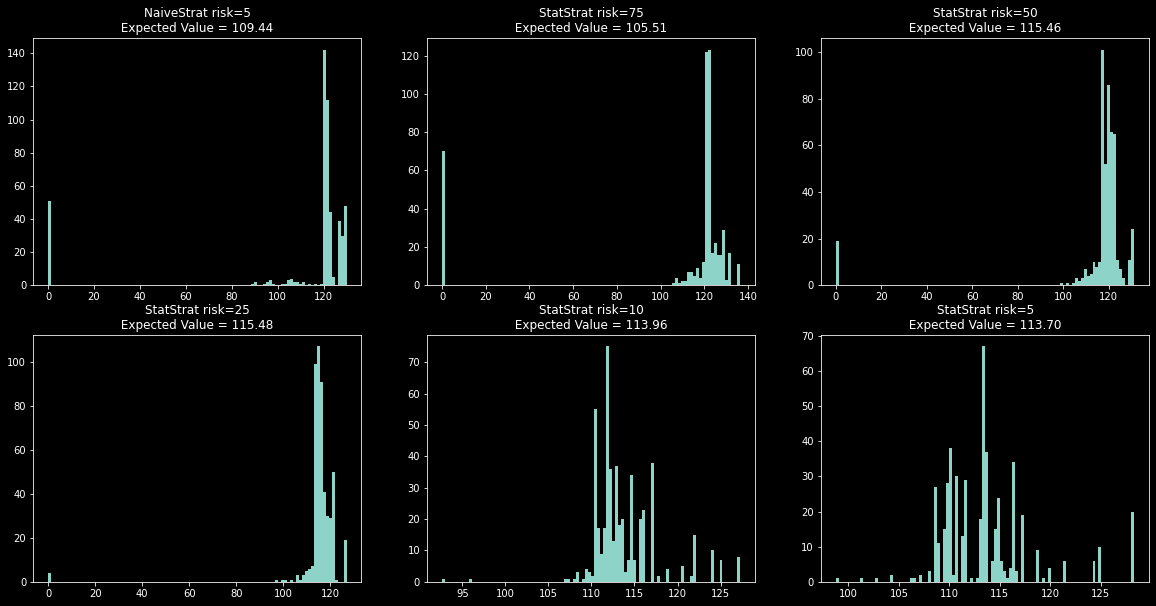

In [22]:
fig, axs = plt.subplots(ncols = 2, nrows=2, figsize=(20,10))
axs = axs.reshape(-1)
for (ax,strat,earn) in enumerat(zip(axs,strats,earns)):
    ax.hist(earn,bins=100)
    ax.set_title(f"{strat}\n Expected Value = {np.mean(earn):.2f} ")
plt.savefig('hists.jpg')